In [1]:
kk 0

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!kk0:起始>^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [2]:
set_matplotlib_formats('svg')

## 绘图函数简介

### 对数坐标图

对数坐标是怎么画出来的?
* 没有改变原始数据的值,只是拉伸了坐标轴
* 改变原始数据, 不拉伸坐标轴, 只是将坐标轴的标签改成对数形式 y

C:\Users\tfliu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


(0, 5)

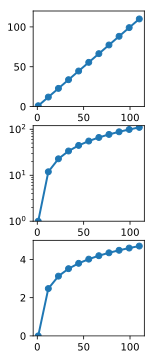

In [3]:
plt.close("all")

x = np.linspace(1,110,11)
y = np.linspace(1,110,11)
y2 = np.log(np.linspace(1,110,11))

fig, axes =plt.subplots(3,1, figsize=(2,6) )

axes[0].plot(x, y, "-o", linewidth=2)
axes[1].semilogy(x, y, "-o", linewidth = 2)
axes[2].plot(x, y2, "-o", linewidth = 2)


axes[0].set_ylim(0, 120)
axes[1].set_ylim(0, 120)
axes[2].set_ylim(0, 5)

低通滤波器的频率响应：算术坐标（左上）、X轴对数坐标（右上）、Y轴对数坐标（左下）、双对数坐标（右上） 

C:\Users\tfliu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


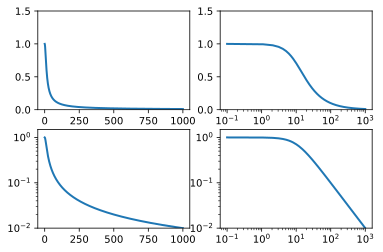

In [4]:
w = np.linspace(0.1, 1000, 1000)
p = np.abs(1/(1+0.1j*w)) # 计算低通滤波器的频率响应

fig, axes = plt.subplots(2, 2)

functions = ("plot", "semilogx", "semilogy", "loglog")

for ax, fname in zip(axes.ravel(), functions):
    func = getattr(ax, fname)
    func(w, p, linewidth=2)
    ax.set_ylim(0, 1.5)

### 极坐标图

极坐标中的圆、螺旋线和玫瑰线

(<a list of 4 Line2D thetagridline objects>,
 <a list of 2 Text thetagridlabel objects>)

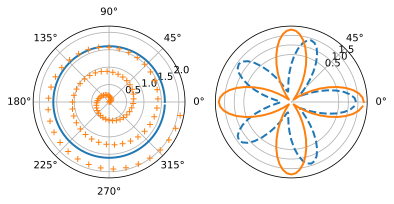

In [5]:
theta = np.arange(0, 2*np.pi, 2*np.pi/100)

plt.subplot(121, polar=True) # 创建极坐标子图
plt.plot(theta, 1.6*np.ones_like(theta), linewidth=2)
# 每个角度上的长度都为1-->圆 
# 极坐标子图下可用plot画极坐标曲线  

plt.plot(3*theta, theta/3, "+", markersize=6)

plt.subplot(122, polar=True)
plt.plot(theta, 1.4*np.cos(5*theta), "--", linewidth=2)
plt.plot(theta, 1.8*np.cos(4*theta), linewidth=2)

plt.rgrids(np.arange(0.5, 2, 0.5), angle=45) 
# 原栅格及其文字标记, 径向标记
plt.thetagrids([0, 45]) 
# 角度标记;

### 柱状图

中国男女人口的年龄分布图

In [6]:
%%disabled 
data = np.loadtxt("china_population.txt")
width = (data[1,0] - data[0,0])*0.4 
plt.figure(figsize=(4, 2))
c1, c2 = plt.rcParams['axes.color_cycle'][:2]
plt.bar(data[:,0]-width, data[:,1]/1e7, width, color=c1, label=u"Male") 
plt.bar(data[:,0], data[:,2]/1e7, width, color=c2, label=u"Female")
plt.xlim(-width, 100)
plt.xlabel(u"Age")
plt.ylabel(u"Population (1e7)")
plt.legend();

### 散列图

指定点的颜色和大小的散列

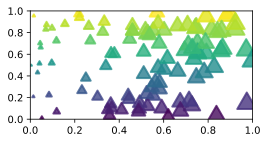

In [7]:
plt.figure(figsize=(4, 2))
x = np.random.random(100)
y = np.random.random(100)

plt.scatter(x, y, s=x*500, c=y, \
            alpha=0.8, lw=2, facecolors="none",\
           marker=( 3, 0))
plt.xlim(0, 1)
plt.ylim(0, 1);

### 图像

In [8]:
img = plt.imread("lena.jpg")
%P img.shape; img.dtype

 1): (393, 512, 3),     2): uint8,    


用imread()和imshow()显示图像

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


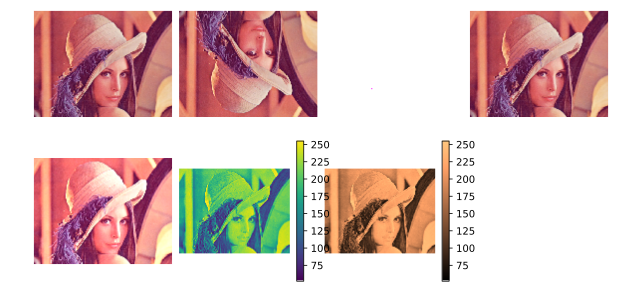

In [9]:
img = plt.imread("lena.jpg")
fig, axes = plt.subplots(2, 4, figsize=(8, 4))
fig.subplots_adjust(0, 0, 1, 1, 0.05, 0.05)

axes = axes.ravel()

axes[0].imshow(img)                        #
axes[1].imshow(img, origin="lower")        #
axes[2].imshow(img * 1.0)                  #
axes[3].imshow(img / 255.0)                #
axes[4].imshow(np.clip(img / 200.0, 0, 1)) #

axe_img = axes[5].imshow(img[:, :, 0])     #
plt.colorbar(axe_img, ax=axes[5])

axe_img = axes[6].imshow(img[:, :, 0], cmap="copper") 
plt.colorbar(axe_img, ax=axes[6])

for ax in axes:
    ax.set_axis_off()

In [10]:
%%disabled
import matplotlib.cm as cm
cm._cmapnames[:5]

使用imshow()可视化二元函数

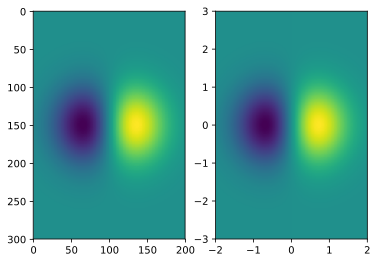

In [11]:
y, x = np.ogrid[-3:3:300j, -2:2:200j]
z = x * np.exp( - x**2 - y**2) 

extent = [np.min(x), np.max(x), np.min(y), np.max(y)] #❷

plt.figure(figsize=(6,6))

plt.subplot(121)
plt.imshow( z ) 

plt.subplot(122)
plt.imshow(z, extent=extent) 
# extent 虽然改变了刻度标签, 但是标签的顺序与Y轴的方向相反

使用imshow()可视化二元函数

NameError: name 'cm' is not defined

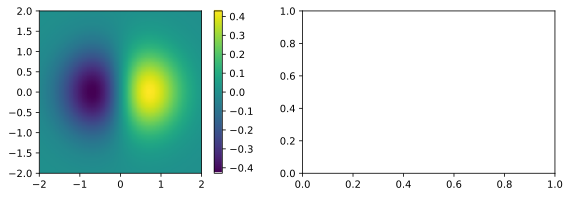

In [12]:
y, x = np.ogrid[-2:2:200j, -2:2:200j]
z = x * np.exp( - x**2 - y**2) #❶

extent = [np.min(x), np.max(x), np.min(y), np.max(y)] #❷

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(z, extent=extent, origin="lower") #❷
plt.colorbar()
plt.subplot(122)
plt.imshow(z, extent=extent, cmap=cm.gray, origin="lower")
plt.colorbar();

### 等值线图

用contour(左)和contourf(右)描绘等值线图

In [ ]:
plt.close("all")
y, x = np.ogrid[-2:2:200j, -3:3:300j] #
z = x * np.exp( - x**2 - y**2) 

extent = [np.min(x), np.max(x), np.min(y), np.max(y)]

plt.figure(figsize=(5,2))
plt.subplot(121)
cs = plt.contour(z, 10, extent=extent) #
plt.clabel(cs) #
plt.subplot(122)
plt.contourf(x.reshape(-1), y.reshape(-1), z, 20) #

> 如果需要对散列点数据绘制等值线图，可以先使用`scipy.interpolate`模块中提供的插值函数将散列点数据插值为网格数据

使用等值线绘制隐函数曲线（左），获取等值线数据并绘图（右）

In [ ]:
y, x = np.ogrid[-1.5:1.5:200j, -1.5:1.5:200j]
f = (x**2 + y**2)**4 - (x**2 - y**2)**2

plt.figure(figsize=(4.5, 2))


plt.subplot(121)
extent = [np.min(x), np.max(x), np.min(y), np.max(y)]

cs = plt.contour(f, extent=extent, levels=[0, 0.1],    #
     colors=["b", "r"], linestyles=["solid", "dashed"], linewidths=[2, 2])

plt.subplot(122)
for c in cs.collections: #
    data = c.get_paths()[0].vertices
    plt.plot(data[:,0], data[:,1], 
        color=c.get_color()[0],  linewidth=c.get_linewidth()[0])

In [ ]:
%P cs
cs.collections    

In [ ]:
%P cs.collections[0].get_color()[0]
%P cs.collections[0].get_linewidth()[0]

In [ ]:
len(cs.collections[0].get_paths())

In [ ]:
path = cs.collections[0].get_paths()[0]
path.vertices

### 四边形网格

In [ ]:
X = np.array([[0, 1, 2], 
              [0, 1, 2]])
Y = np.array([[0, 0.2, 0],
              [1, 0.8, 1]])
Z = np.array([[0.5, 0.8]])

演示pcolormesh()绘制的四边形以及其填充颜色

In [ ]:
plt.plot(X.ravel(), Y.ravel(), "ko")
plt.pcolormesh(X, Y, Z)
plt.margins(0.1);

使用pcolormesh()绘制复数平面上的坐标变换

In [ ]:
def make_mesh(n):
    x, y = np.mgrid[-10:0:n*1j, -5:5:n*1j]

    s = x + 1j*y
    z = (2 + s) / (2 - s)
    return s, z

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
for ax in axes:
    ax.set_aspect("equal")
    
s1, z1 = make_mesh(10)
s2, z2 = make_mesh(200)
axes[0].pcolormesh(s1.real, s1.imag, np.abs(s1))
axes[1].pcolormesh(z1.real, z1.imag, np.abs(s1))
axes[2].pcolormesh(s2.real, s2.imag, np.abs(s2), rasterized=True)
axes[3].pcolormesh(z2.real, z2.imag, np.abs(s2), rasterized=True);

使用pcolormesh()绘制极坐标中的网格

In [ ]:
def func(theta, r):
    y = theta * np.sin(r)
    return np.sqrt(y*y)

T, R = np.mgrid[0:2*np.pi:360j, 0:10:100j]
Z = func(T, R)

ax=plt.subplot(111, projection="polar", aspect=1.)
ax.pcolormesh(T, R, Z, rasterized=True);

### 三角网格

In [ ]:
with open("diffusion.txt") as f:
    data = {"points":[], "triangles":[], "values":[]}
    values = None
    for line in f:
        line = line.strip()
        if not line:
            continue
        if line.startswith("#"):
            values = data[line[1:]]
            continue
        values.append([float(s) for s in line.split()])
        
data = {key:np.array(data[key]) for key in data}

使用tripcolor()和tricontour()绘制三角网格和等值线

In [ ]:
X, Y = data["points"].T
triangles = data["triangles"].astype(int)
values = data["values"].squeeze()

fig, ax = plt.subplots(figsize=(12, 4.5))
ax.set_aspect("equal")

mapper = ax.tripcolor(X, Y, triangles, values, cmap="gray") #❶
plt.colorbar(mapper, label=u"温度")

plt.triplot(X, Y, triangles, lw=0.5, alpha=0.3, color="k") #❷

Xc = X[triangles].mean(axis=1)
Yc = Y[triangles].mean(axis=1)
plt.tricontour(Xc, Yc, values, 10) #❸;

### 箭头图

用quiver()绘制矢量场

In [ ]:
np.random.seed(5)
x = np.linspace(0,10,11)
y = x**2*np.exp(-x)
u = np.array([x[i+1]-x[i] for i in range(len(x)-1)])
v = np.array([y[i+1]-y[i] for i in range(len(x)-1)])
x = x[:len(u)] # 使得维数和u,v一致
y = y[:len(v)]
c = np.random.randn(len(u)) # arrow颜色
plt.figure()
plt.plot(x,y,'rs')
plt.quiver(x,y,u,v,c, angles='xy', scale_units='xy', scale=1) # 注意参数的赋值
plt.grid(True)
plt.show()


In [ ]:
def f(x, y):
    return x * np.exp(- x**2 - y**2)

def vec_field(f, x, y, dx=1e-6, dy=1e-6):
    x2 = x + dx
    y2 = y + dy
    v = f(x, y)
    vx = (f(x2, y) - v) / dx
    vy = (f(x, y2) - v) / dy 
    return vx, vy

vec_field(f,2,3)

X, Y = np.mgrid[-2:2:20j, -2:2:20j]
C = f(X, Y)
U, V = vec_field(f, X, Y)
plt.quiver(X, Y, U, V, C)
plt.colorbar();
plt.gca().set_aspect("equal")

In [ ]:
def f(x,y):
    return (y-x)/np.sqrt(x**2+y**2)
# 函数的偏导数就代表箭头矢量
def vec_field(f, x, y, dx=1e-6, dy=1e-6):
    x2 = x + dx
    y2 = y + dy
    v = f(x, y)
    vx = (f(x2, y) - v) / dx
    vy = (f(x, y2) - v) / dy 
    return vx, vy

In [ ]:
X, Y = np.mgrid[1:3:6j, 1:3:6j]
C = f(X, Y) #函数值的大小用颜色进行区分
U, V = vec_field(f, X, Y)
plt.quiver(X, Y, U, V, C)
plt.colorbar();
plt.gca().set_aspect("equal")

使用箭头表示参数曲线的切线方向

In [ ]:
n = 40
arrow_size = 16
t = np.linspace(0, 1, 1000)
x = np.sin(3*2*np.pi*t)
y = np.cos(5*2*np.pi*t)
line, = plt.plot(x, y, lw=1)

lengths = np.cumsum(np.hypot(np.diff(x), np.diff(y)))
length = lengths[-1]
arrow_locations = np.linspace(0, length, n, endpoint=False)
index = np.searchsorted(lengths, arrow_locations)
dx = x[index + 1] - x[index]
dy = y[index + 1] - y[index]
ds = np.hypot(dx, dy)
dx /= ds
dy /= ds
plt.quiver(x[index], y[index], dx, dy, t[index],
          units="dots", scale_units="dots", 
          angles="xy", scale=1.0/arrow_size, pivot="middle",
          edgecolors="black", linewidths=1,
          width=1, headwidth=arrow_size*0.5, 
          headlength=arrow_size, headaxislength=arrow_size, 
          zorder=100)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5]);

使用quiver()绘制神经网络结构示意图

In [ ]:
levels = [4, 5, 3, 2]
x = np.linspace(0, 1, len(levels))

for i in range(len(levels) - 1):
    j = i + 1
    n1, n2 = levels[i], levels[j]
    y1, y2 = np.mgrid[0:1:n1*1j, 0:1:n2*1j]
    x1 = np.full_like(y1, x[i])
    x2 = np.full_like(y2, x[j])
    plt.quiver(x1, y1, x2-x1, y2-y1, 
              angles="xy", units="dots", scale_units="xy", 
              scale=1, width=2, headlength=10,
              headaxislength=10, headwidth=4)
    
yp = np.concatenate([np.linspace(0, 1, n) for n in levels])
xp = np.repeat(x, levels)
plt.plot(xp, yp, "o", ms=12)
plt.gca().axis("off")
plt.margins(0.1, 0.1);

### 三维绘图

In [ ]:
#%fig=使用mplot3D绘制的三维曲面图
import mpl_toolkits.mplot3d #❶

x, y = np.mgrid[-2:2:20j, -2:2:20j] #❷
z = x * np.exp( - x**2 - y**2)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d') #❸
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap = plt.cm.Blues_r) #❹
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

In [ ]:
kk 2